# Assignment - Exercise 5.2 Graph Analysis
## Week#5
## Date - July-10-2021
## Author - Ganesh Kale

#### _import required packages_

In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

#### _Load data into a dataframe_

In [2]:
articles = pd.read_csv("data/articles1.csv")

#### _display dimension of the data and top 5 records_

In [3]:
articles.shape
articles.head()

(50000, 10)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


#### _diaplsy variable data types in the dataset_

In [4]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50000 non-null  int64  
 1   id           50000 non-null  int64  
 2   title        50000 non-null  object 
 3   publication  50000 non-null  object 
 4   author       43694 non-null  object 
 5   date         50000 non-null  object 
 6   year         50000 non-null  float64
 7   month        50000 non-null  float64
 8   url          0 non-null      float64
 9   content      50000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.8+ MB


#### _describe data - numerical datatypes_

In [5]:
articles.describe()

,Unnamed: 0,id,year,month,url
count,50000.000000,50000.000000,50000.000000,50000.000000,0.0
mean,25694.378380,44432.454800,2016.273700,5.508940,NaN
std,15350.143677,15773.615179,0.634694,3.333062,NaN
min,0.000000,17283.000000,2011.000000,1.000000,NaN
25%,12500.750000,31236.750000,2016.000000,3.000000,NaN
50%,25004.500000,43757.500000,2016.000000,5.000000,NaN
75%,38630.250000,57479.250000,2017.000000,8.000000,NaN
max,53291.000000,73469.000000,2017.000000,12.000000,NaN


#### _describe data - object data type_

In [6]:
articles.describe(include=['O'])

,title,publication,author,date,content
count,50000,50000,43694,50000,50000
unique,49920,5,3603,983,49888
top,The 10 most important things in the world righ...,Breitbart,Breitbart News,2016-08-22,advertisement
freq,7,23781,1559,221,42


#### _display unique publications_

In [7]:
articles.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic'], dtype=object)

#### _display min and max year from the data set_

In [8]:
articles.year.min()
articles.year.max()

2011.0

2017.0

#### _display how many articles from each year_

In [9]:
articles.year.value_counts()

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

## Graph Analysis

#### _display bar chart of articles sorted by Publication Name_

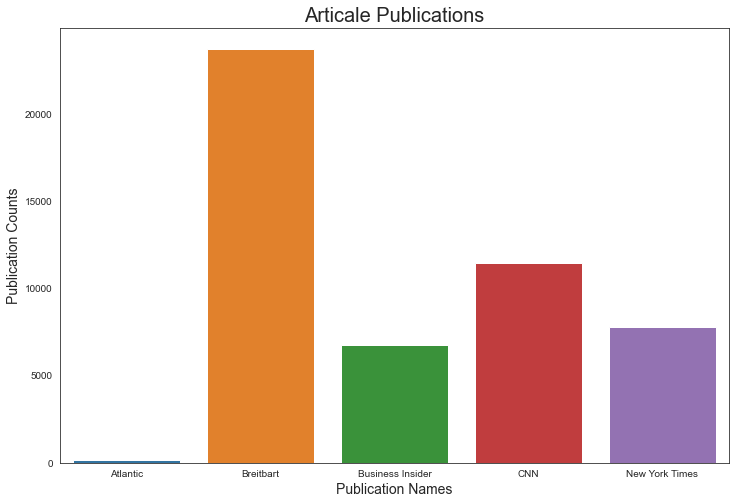

In [10]:
# create variable to save article publications sorted by names

publications_count = articles.publication.value_counts().sort_index()

# set plot style and figure size

sns.set_style('white')
plt.figure(figsize=(12,8))

#plot barchart for articale publications counts

sns.barplot(x=publications_count.index, y= publications_count)
plt.xlabel("Publication Names",fontdict = {"fontsize":14})
plt.ylabel("Publication Counts",fontdict = {"fontsize":14})
plt.title("Articale Publications",fontdict = {"fontsize":20});

#### _display bar chart of articles sorted by counts_

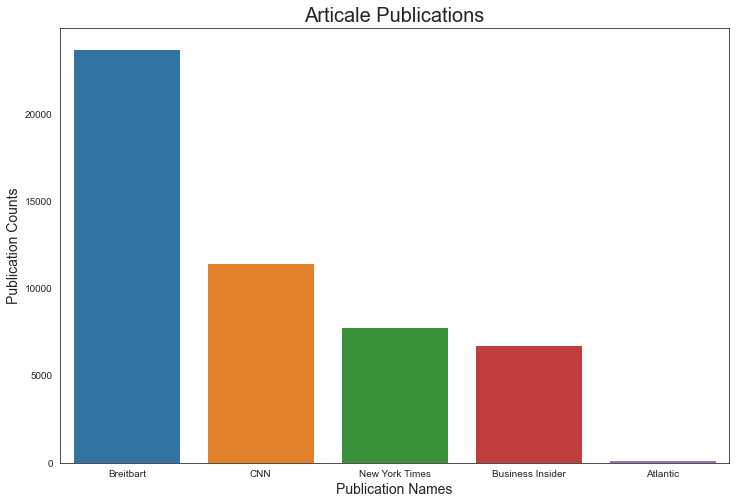

In [11]:
# create variable to save article publications sorted by counts

pub_counts = articles.publication.value_counts()

# set plot style and figure size

sns.set_style('white')
plt.figure(figsize=(12,8))

#plot barchart for articale publications counts

sns.barplot(x=pub_counts.index, y= pub_counts)
plt.xlabel("Publication Names",fontdict = {"fontsize":14})
plt.ylabel("Publication Counts",fontdict = {"fontsize":14})
plt.title("Articale Publications",fontdict = {"fontsize":20});

In [12]:
# distribution of articale publications

articles.publication.value_counts()

Breitbart           23781
CNN                 11488
New York Times       7803
Business Insider     6757
Atlantic              171
Name: publication, dtype: int64

### Clean Text
1. Remove Punctuations from the contents
2. lower case all the contents

In [13]:
def clean_text(article):
    
    """function to remove punctuation from text 
    and lower case of it"""
    
    text = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ',text)

#### _create new column by applyong clean_text function on contents_

In [14]:
articles['tokenized'] = articles.content.apply(lambda x:clean_text(x))

In [15]:
# top 5 records of new column

articles.tokenized.head()

0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object

#### _create new column for length of words in cleaned contents_

In [16]:
articles['num_words'] = articles.tokenized.apply(lambda x: len(x.split()))

In [17]:
# display top 5 records of new column num_words

articles.num_words.head()

0     876
1    4743
2    2350
3    2104
4     690
Name: num_words, dtype: int64

#### _display min, max, count, mean..etc of new column num_words_

In [18]:
articles.num_words.describe()

count    50000.000000
mean       636.260460
std        644.856619
min          0.000000
25%        275.000000
50%        468.000000
75%        832.000000
max      24736.000000
Name: num_words, dtype: float64

#### _remove artcles with no contents_

In [19]:
# no. of  articles with no contents

articles.loc[articles.num_words == 0].shape[0]

65

In [20]:
# keep articles with non-zero word length/remove articles with no contents

articles = articles.loc[articles.num_words > 0]

In [21]:
# articles num_words columns descriptive stats


articles.num_words.describe()

count    49935.000000
mean       637.088675
std        644.867203
min          1.000000
25%        276.000000
50%        469.000000
75%        833.000000
max      24736.000000
Name: num_words, dtype: float64

#### _check for outliers_
1. plot histogram of num_words column
2. plot box plot of num_words column

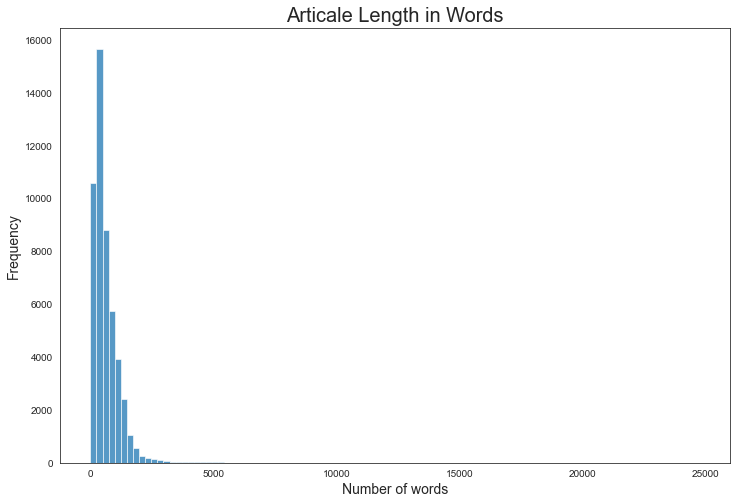

In [22]:
# set plot style and figure size

sns.set_style('white')
plt.figure(figsize=(12,8))

#plot histogramm for number of words from contents column

sns.histplot(x='num_words', data=articles,bins=100)
plt.xlabel("Number of words",fontdict = {"fontsize":14})
plt.ylabel("Frequency",fontdict = {"fontsize":14})
plt.title("Articale Length in Words",fontdict = {"fontsize":20});

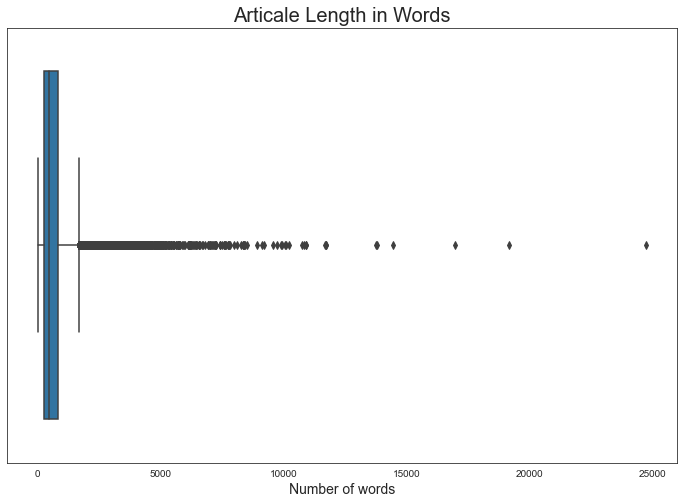

In [23]:
# set plot style and figure size

sns.set_style('white')
plt.figure(figsize=(12,8))

#plot boxplot for number of words from contents column

sns.boxplot(x='num_words', data=articles)
plt.xlabel("Number of words",fontdict = {"fontsize":14})
plt.title("Articale Length in Words",fontdict = {"fontsize":20});

Based on above charts we can see there are outliers present in the dataset, the length of article contents is not same. The median of number of words in article is 500 and from above charts there are articles with 1000 words are more and few are more than 15K words.

# END